# Data analysis for Three Body Problem
## Information about the dataset
Train data: <br>
| Variable  | Description                                      |
|-----------|--------------------------------------------------|
| `t`       | timestep                                         |
| `x_1`     | coordinate x of the position of object 1         |
| `y_1`     | coordinate y of the position of object 1         |
| `v_x_1`   | coordinate x of the velocity of object 1         |
| `v_y_1`   | coordinate y of the velocity of object 1         |
| `x_2`     | coordinate x of the position of object 2         |
| `y_2`     | coordinate y of the position of object 2         |
| `v_x_2`   | coordinate x of the velocity of object 2         |
| `v_y_2`   | coordinate y of the velocity of object 2         |
| `x_3`     | coordinate x of the position of object 3         |
| `y_3`     | coordinate y of the position of object 3         |
| `v_x_3`   | coordinate x of the velocity of object 3         |
| `v_y_3`   | coordinate y of the velocity of object 3         |

Test data:<br>

| Variable  | Description                                                    |
|-----------|----------------------------------------------------------------|
| `t`       | timestep                                                       |
| `x0_1`    | coordinate x of the position of object 1 at time t=0           |
| `y0_1`    | coordinate y of the position of object 1 at time t=0           |
| `x0_2`    | coordinate x of the position of object 2 at time t=0           |
| `y0_2`    | coordinate y of the position of object 2 at time t=0           |
| `x0_3`    | coordinate x of the position of object 3 at time t=0           |
| `y0_3`    | coordinate y of the position of object 3 at time t=0           |

For the test data, we only have the initial positions, and we assume that the initial velocity is zero


In [3]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

## Data

In [4]:
df = pd.read_csv("../data/mlNOVA/mlNOVA/X_train.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1285000 entries, 0 to 1284999
Data columns (total 14 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   t       1285000 non-null  float64
 1   x_1     1285000 non-null  float64
 2   y_1     1285000 non-null  float64
 3   v_x_1   1285000 non-null  float64
 4   v_y_1   1285000 non-null  float64
 5   x_2     1285000 non-null  float64
 6   y_2     1285000 non-null  float64
 7   v_x_2   1285000 non-null  float64
 8   v_y_2   1285000 non-null  float64
 9   x_3     1285000 non-null  float64
 10  y_3     1285000 non-null  float64
 11  v_x_3   1285000 non-null  float64
 12  v_y_3   1285000 non-null  float64
 13  Id      1285000 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 137.3 MB


### Statistics

In [6]:
df.head()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,-0.859196,0.000000,0.000000,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4


In [7]:
df.tail()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
1284995,9.84375,-0.022787,-0.354678,-1.450539,-0.511101,-0.128897,-0.618452,1.066492,-0.497032,0.151684,0.973131,0.384048,1.008133,1284995
1284996,9.88281,-0.082072,-0.384254,-1.556362,-1.038875,-0.084507,-0.627569,1.177829,0.065469,0.166578,1.011822,0.378533,0.973406,1284996
1284997,9.92188,-0.140434,-0.438907,-1.348462,-1.794786,-0.040823,-0.610311,0.975436,0.853069,0.181257,1.049218,0.373027,0.941717,1284997
1284998,9.96094,-0.177344,-0.524277,-0.380080,-2.492241,-0.018380,-0.561151,0.012292,1.579595,0.195724,1.085428,0.367788,0.912645,1284998
1284999,10.00000,-0.163264,-0.618197,1.029575,-2.079003,-0.046730,-0.502346,-1.392434,1.193499,0.209994,1.120543,0.362860,0.885505,1284999


In [8]:
df.columns

Index(['t', 'x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2',
       'x_3', 'y_3', 'v_x_3', 'v_y_3', 'Id'],
      dtype='object')

In [9]:
df.describe()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id
count,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06,1.285000e+06
mean,4.145262e+00,-2.812879e-01,-1.095159e-01,-1.841267e-01,-1.650011e-02,7.171403e-03,-8.201144e-02,3.247712e-02,-8.360838e-02,2.741165e-01,1.915273e-01,1.516496e-01,1.001085e-01,6.424995e+05
std,3.209813e+00,1.695764e+00,1.167686e+00,8.775115e-01,8.064175e-01,1.062984e+00,1.038606e+00,9.362290e-01,9.751777e-01,1.443411e+00,1.683294e+00,7.878988e-01,8.709405e-01,3.709477e+05
min,0.000000e+00,-3.082300e+01,-1.785773e+01,-7.299333e+01,-2.310928e+01,-3.083340e+01,-5.245081e+01,-2.589555e+01,-4.828901e+01,-1.743999e+01,-3.316000e+01,-3.097054e+01,-2.550938e+01,0.000000e+00
25%,1.054690e+00,-4.118489e-01,-3.928434e-01,-5.782370e-01,-2.266108e-01,-3.295574e-01,-1.918623e-01,-2.983937e-01,-4.984175e-01,-4.324075e-01,-4.472183e-01,-1.019181e-01,-2.062900e-01,3.212498e+05
50%,3.945310e+00,0.000000e+00,0.000000e+00,-6.909794e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.306061e-04,6.181826e-02,1.402483e-02,6.424995e+05
75%,6.953120e+00,5.008268e-01,2.634242e-01,1.321657e-01,2.444148e-01,2.103091e-01,2.683916e-01,3.880151e-01,3.262901e-01,5.005791e-01,3.508870e-01,4.864241e-01,4.975648e-01,9.637492e+05
max,1.000000e+01,1.634061e+01,2.627623e+01,2.350346e+01,3.467168e+01,1.550696e+01,3.567946e+01,7.271823e+01,2.311835e+01,6.165640e+01,2.773554e+01,2.596499e+01,4.828874e+01,1.284999e+06


## Some Visualizations

In [10]:
idx = np.hstack((0, df[df.t == 10].index.values +1))
print(idx.shape, df.t.min(), df.t.max())
print(idx)

(4054,) 0.0 10.0
[      0     257     514 ... 1284486 1284743 1285000]


In [11]:
def plot_indx(k):
    """Given an index k, prints the respective trajetories

    Parameters
    ----------
    k : int
        The row of the trajetory

    """
    print(k) # The index being used
    pltidx = range(idx[k], 257+idx[k])
    pltsquare = idx[k]

    # Plot the tragetories
    plt.plot(df.x_1[pltidx], df.y_1[pltidx])
    plt.plot(df.x_2[pltidx], df.y_2[pltidx])
    plt.plot(df.x_3[pltidx], df.y_3[pltidx])

    # Plot the initial positions
    plt.plot(df.x_1[pltsquare], df.y_1[pltsquare], 's')
    plt.plot(df.x_2[pltsquare], df.y_2[pltsquare], 's')
    plt.plot(df.x_3[pltsquare], df.y_3[pltsquare], 's')

    plt.show()

2246


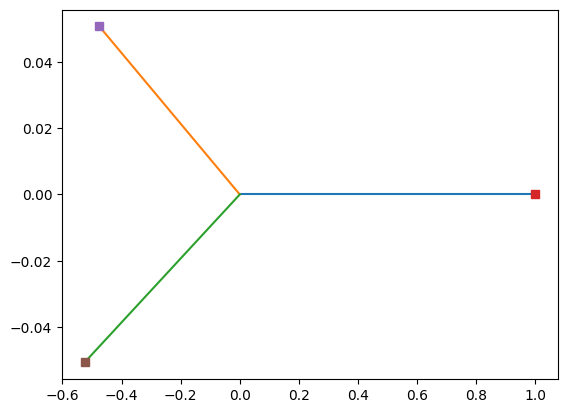

In [12]:
# Selecting a random index from the dataset
k = np.random.randint(idx.shape[0])
plot_indx(k)

### Colisions
When the 3 objects colide, the following lines until the end of the sample is filled with zeros. These zeros are meaningless

619


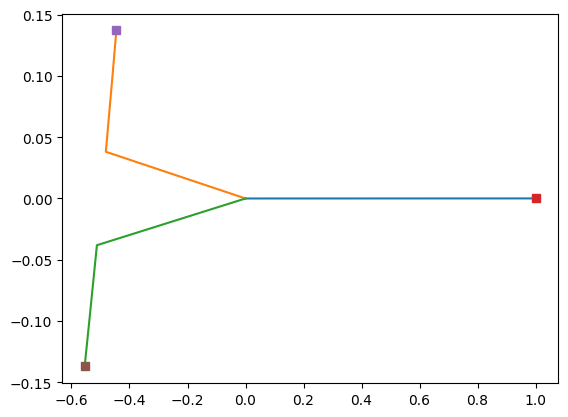

In [13]:
k = 619
plot_indx(k)

## Cleaning the data
Removing the rows after a colision, where all the values are zero.

In [14]:
# Create the trajectory_id column
df['trajectory_id'] = df['Id'] // 257

# Display the first few rows to verify
df.head()

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id,trajectory_id
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,-0.859196,0.000000,0.000000,0,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1,0
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2,0
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3,0
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4,0


In [15]:
# Filter out rows where all columns except 'Id' and trajectory_Id are zero
df_filtered = df.loc[~(df.drop(columns=['Id','trajectory_id']) == 0).all(axis=1)]
df_filtered

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id,trajectory_id
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,-0.859196,0.000000,0.000000,0,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1,0
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2,0
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3,0
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284995,9.843750,-0.022787,-0.354678,-1.450539,-0.511101,-0.128897,-0.618452,1.066492,-0.497032,0.151684,0.973131,0.384048,1.008133,1284995,4999
1284996,9.882810,-0.082072,-0.384254,-1.556362,-1.038875,-0.084507,-0.627569,1.177829,0.065469,0.166578,1.011822,0.378533,0.973406,1284996,4999
1284997,9.921880,-0.140434,-0.438907,-1.348462,-1.794786,-0.040823,-0.610311,0.975436,0.853069,0.181257,1.049218,0.373027,0.941717,1284997,4999
1284998,9.960940,-0.177344,-0.524277,-0.380080,-2.492241,-0.018380,-0.561151,0.012292,1.579595,0.195724,1.085428,0.367788,0.912645,1284998,4999


## Creating the Test and Train tests

### Feature and Target Tables

- **X_raw**: 
    ```['t', 'x_1(0)', 'y_1(0)', 'v_x_1(0)', 'v_y_1(0)', 'x_2(0)', 'y_2(0)', 'v_x_2(0)', 'v_y_2(0)', 'x_3(0)', 'y_3(0)', 'v_x_3(0)', 'v_y_3(0)']```
    - This is a raw feature table where all the rows are replicated to be the first position of each trajectory. It contains the speed columns as well.

- **Y_raw**: 
    ```[x_1(t), y_1(t), v_x_1(t), v_y_1(t), x_2(t), y_2(t), v_x_2(t), v_y_2(t), x_3(t), y_3(t), v_x_3(t), v_y_3(t)]```
    - This is what we will train the model to predict.

The columns to exclude can be splitting the dataset.

In [16]:
# Features
# Group by 'trajectory_id' and get the first occurrence of each group
first_occurrence = df_filtered.groupby('trajectory_id').first().reset_index()
# Merge first occurrence back to the original dataframe, only replacing columns that need to be kept constant
columns_to_replace = df_filtered.columns.difference(['t', 'trajectory_id', 'Id'])  # Columns to replace except 't' and 'trajectory_id'
# We merge 'first_occurrence' on 'trajectory_id' with the original dataframe,
# and only replace the required columns.
X_raw = df_filtered[['t', 'trajectory_id', 'Id']].merge(
    first_occurrence[['trajectory_id'] + list(columns_to_replace)],
    on='trajectory_id',
    how='left'
)
# Reorder the columns
X_raw = X_raw[['t', 'x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2', 'x_3', 'y_3', 'v_x_3', 'v_y_3', 'Id', 'trajectory_id']]
X_raw

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id,trajectory_id
0,0.000000,1.0,0.0,0.0,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0,0
1,0.039062,1.0,0.0,0.0,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,1,0
2,0.078125,1.0,0.0,0.0,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,2,0
3,0.117188,1.0,0.0,0.0,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,3,0
4,0.156250,1.0,0.0,0.0,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089785,9.843750,1.0,0.0,0.0,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284995,4999
1089786,9.882810,1.0,0.0,0.0,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284996,4999
1089787,9.921880,1.0,0.0,0.0,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284997,4999
1089788,9.960940,1.0,0.0,0.0,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284998,4999


In [17]:
# Target
Y_raw = df_filtered[['x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2', 'x_3', 'y_3', 'v_x_3', 'v_y_3', 'Id', 'trajectory_id']]
Y_raw

,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,y_3,v_x_3,v_y_3,Id,trajectory_id
0,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,-0.859196,0.000000,0.000000,0,0
1,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,-0.858874,0.012584,0.016526,1,0
2,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,-0.857905,0.025189,0.033078,2,0
3,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,-0.856289,0.037837,0.049685,3,0
4,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,-0.854022,0.050548,0.066372,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284995,-0.022787,-0.354678,-1.450539,-0.511101,-0.128897,-0.618452,1.066492,-0.497032,0.151684,0.973131,0.384048,1.008133,1284995,4999
1284996,-0.082072,-0.384254,-1.556362,-1.038875,-0.084507,-0.627569,1.177829,0.065469,0.166578,1.011822,0.378533,0.973406,1284996,4999
1284997,-0.140434,-0.438907,-1.348462,-1.794786,-0.040823,-0.610311,0.975436,0.853069,0.181257,1.049218,0.373027,0.941717,1284997,4999
1284998,-0.177344,-0.524277,-0.380080,-2.492241,-0.018380,-0.561151,0.012292,1.579595,0.195724,1.085428,0.367788,0.912645,1284998,4999


In [18]:
def plot_y_yhat(y_test,y_pred, plot_title = "plot"):
    labels = ['x_1','y_1','x_2','y_2','x_3','y_3']
    MAX = 500
    if len(y_test) > MAX:
        idx = np.random.choice(len(y_test),MAX, replace=False)
    else:
        idx = np.arange(len(y_test))
    plt.figure(figsize=(10,10))
    for i in range(6):
        x0 = np.min(y_test[idx,i])
        x1 = np.max(y_test[idx,i])
        plt.subplot(3,2,i+1)
        plt.scatter(y_test[idx,i],y_pred[idx,i])
        plt.xlabel('True '+labels[i])
        plt.ylabel('Predicted '+labels[i])
        plt.plot([x0,x1],[x0,x1],color='red')
        plt.axis('square')
    plt.savefig(plot_title+'.pdf')
    plt.show()

In [19]:
# Split the data for training and testing
"""
Splits the dataset into training and testing sets based on unique trajectory IDs.
Parameters:
X (pd.DataFrame): The feature dataset containing a 'trajectory_id' column.
y (pd.DataFrame): The target dataset containing a 'trajectory_id' column.
test_size (float, optional): The proportion of the dataset to include in the test split. Default is 0.2.
columns_to_drop (list, optional): List of columns to drop from the feature dataset. Default is an empty list.
Returns:
tuple: A tuple containing four DataFrames:
    - X_train (pd.DataFrame): The training set of the feature dataset.
    - X_test (pd.DataFrame): The testing set of the feature dataset.
    - y_train (pd.DataFrame): The training set of the target dataset.
    - y_test (pd.DataFrame): The testing set of the target dataset.
"""

def custom_train_test_split(X, y, test_size=0.2, columns_to_drop=[]):
    # Get unique trajectory_ids
    unique_ids = X['trajectory_id'].unique()
    
    # Split the trajectory_ids into train and test sets
    train_ids, test_ids = train_test_split(unique_ids, test_size=test_size, random_state=42)
    
    # Split the data based on the trajectory_ids
    X_train = X[X['trajectory_id'].isin(train_ids)]
    X_test = X[X['trajectory_id'].isin(test_ids)]
    y_train = y[y['trajectory_id'].isin(train_ids)]
    y_test = y[y['trajectory_id'].isin(test_ids)]
    
    X_columns_drop = ['trajectory_id', 'Id'] + columns_to_drop
    Y_columns_drop = ['trajectory_id', 'Id'] + columns_to_drop

    # Drop the specified columns from X and y
    X_train = X_train.drop(columns=X_columns_drop)
    X_test = X_test.drop(columns=X_columns_drop)
    y_train = y_train.drop(columns=Y_columns_drop)
    y_test = y_test.drop(columns=Y_columns_drop)
    
    return X_train, X_test, y_train, y_test

In [20]:
from sklearn.pipeline import Pipeline

# Create a pipeline with StandardScaler and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression()) # Can be variable
])

# Fazer função que recebe modelo e pipeline
# Usar um python normal file
test_model(regressor)

### Model with velocities

In [32]:
# Split the data
X_train, X_test, y_train, y_test = custom_train_test_split(X_raw, Y_raw, test_size=0.2)

# Scale the features
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Train the model
model = pipeline.fit(X_train,y_train)

print(model.score(X_test, y_test))

# Convert X_train and y_train to DataFrames
X_train_df = pd.DataFrame(X_train, columns=['t','x_1', 'y_1', 'v_x_1', 'v_y_1', 'x_2', 'y_2', 'v_x_2', 'v_y_2', 'x_3', 'y_3', 'v_x_3', 'v_y_3'])
y_train_df = pd.DataFrame(y_train, columns=['x_1', 'y_1', 'x_2', 'y_2', 'x_3', 'y_3'])

0.04889743732805755


y_train_mse: 
1.4193371413046307
y_test_mse: 
1.4193371413046307


/Users/filipecolladavid/FCT_NOVA/AA/AA_three-body_problem/venv/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


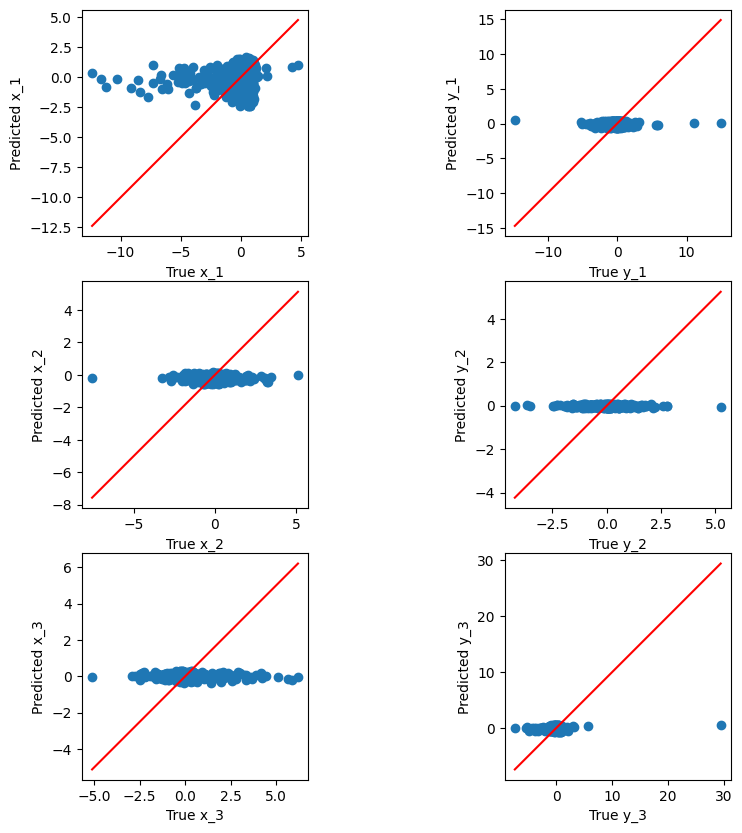

In [29]:
# Predict on the train set
y_pred_train = model.predict(X_train)
y_train_mse = mean_squared_error(y_train, y_pred_train)
print("y_train_mse: ")
print(y_train_mse)

# Predict on the test set
y_pred_test = model.predict(X_test)
y_test_mse = mean_squared_error(y_test, y_pred_test)
print("y_test_mse: ")
print(y_train_mse)

# Plot the results 
plot_y_yhat(y_test.values, y_pred_train, plot_title="LinearRegression_Predictions")

### Model without velocities.

0.08802104974471377


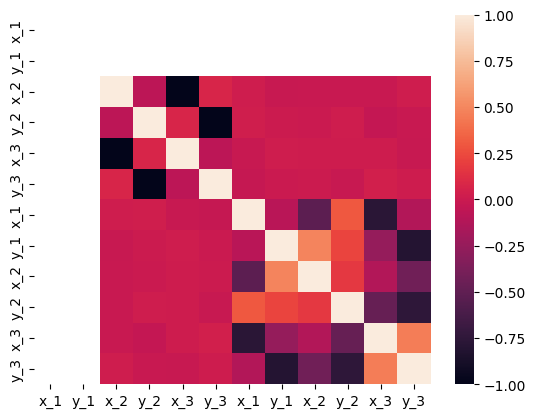

In [21]:
# Split the data
X_train, X_test, y_train, y_test = custom_train_test_split(X_raw, Y_raw, test_size=0.2, columns_to_drop=["v_x_1", "v_y_1", "v_x_2", "v_y_2", "v_x_3", "v_y_3"])

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the model
model_no_vel = LinearRegression()
model_no_vel.fit(X_train, y_train)

print(model_no_vel.score(X_test, y_test))

# Predict on the test set
y_pred_no_vel = model_no_vel.predict(X_test)

# Convert X_train and y_train to DataFrames
X_train_df = pd.DataFrame(X_train, columns=['t','x_1', 'y_1', 'x_2', 'y_2', 'x_3', 'y_3'])
y_train_df = pd.DataFrame(y_train, columns=['x_1', 'y_1', 'x_2', 'y_2', 'x_3', 'y_3'])

sns.heatmap(pd.concat([X_train_df[[ 'x_1', 'y_1', 'x_2', 'y_2', 'x_3', 'y_3']], y_train_df[['x_1', 'y_1', 'x_2', 'y_2', 'x_3', 'y_3']]], axis=1).corr())
plt.show()

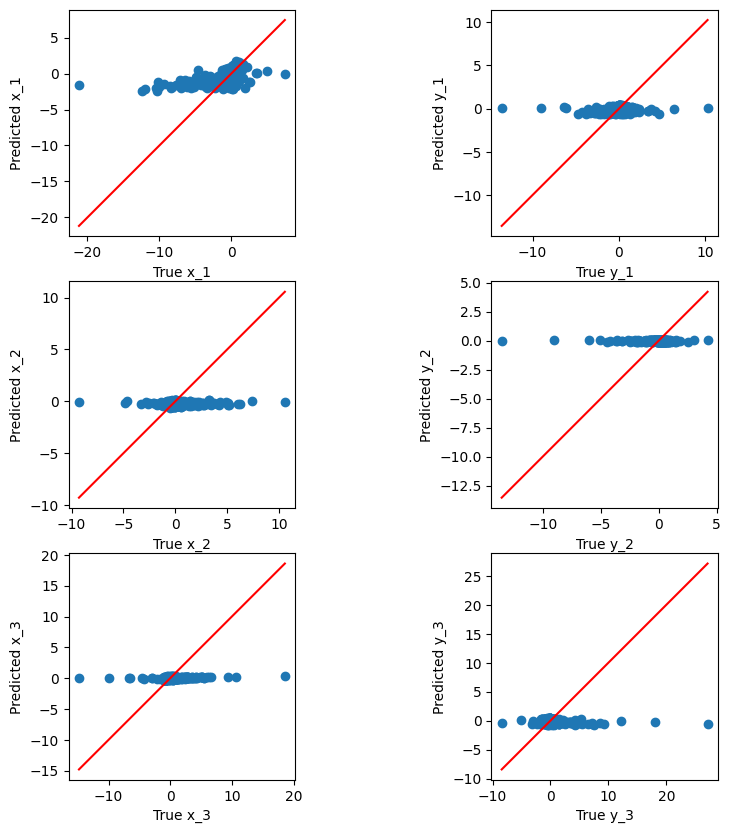

In [22]:
plot_y_yhat(y_test.values, y_pred, plot_title="LinearRegression_Predictions")

In [23]:
df_real = pd.read_csv("../data/mlNOVA/mlNOVA/X_test.csv")
df_real

,Id,t,x0_1,y0_1,x0_2,y0_2,x0_3,y0_3
0,0,0.000000,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
1,1,0.039062,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
2,2,0.078125,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
3,3,0.117188,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
4,4,0.156250,1.0,0.0,-0.179617,0.730085,-0.820383,-0.730085
...,...,...,...,...,...,...,...,...
1041616,1041616,9.843750,1.0,0.0,-0.207166,0.852911,-0.792834,-0.852911
1041617,1041617,9.882810,1.0,0.0,-0.207166,0.852911,-0.792834,-0.852911
1041618,1041618,9.921880,1.0,0.0,-0.207166,0.852911,-0.792834,-0.852911
1041619,1041619,9.960940,1.0,0.0,-0.207166,0.852911,-0.792834,-0.852911


(1041621, 7)


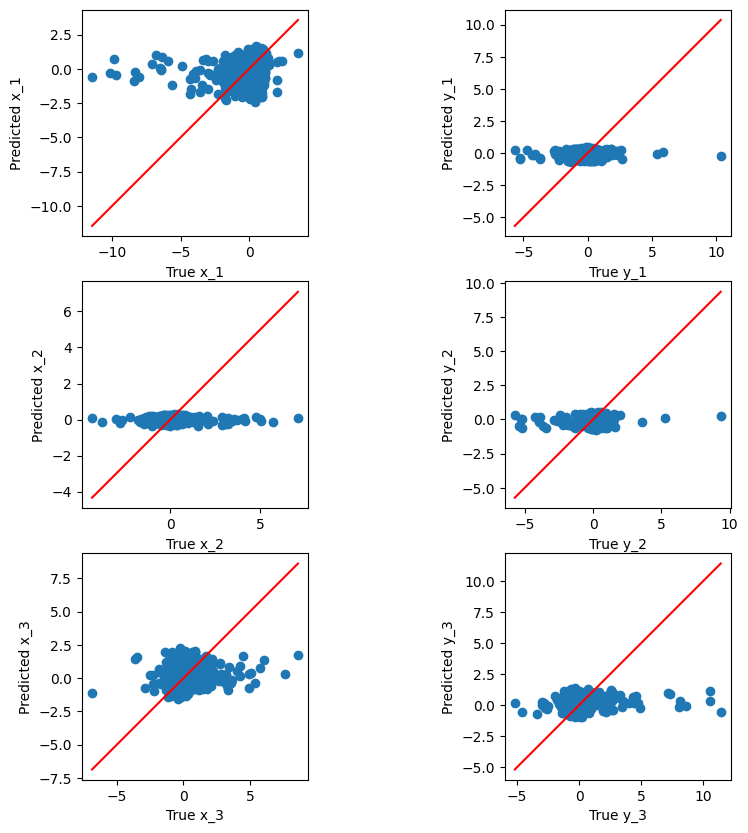

In [24]:
# Preprocess df_real to match the format expected by the model
X_real = df_real[['t','x0_1', 'y0_1', 'x0_2', 'y0_2', 'x0_3', 'y0_3']]

# Scale the features
scaler = StandardScaler()
X_real_scaled = scaler.fit_transform(X_real)

# Make predictions using the trained model
y_real_pred = model_no_vel.predict(X_real_scaled)
y_real_pred

# Create an Id table
Id_table = df_real[['Id']]

# Convert y_real_pred to a DataFrame and drop the speed columns
y_real_pred_df = pd.DataFrame(y_real_pred, columns=['x_1', 'y_1', 'x_2', 'y_2', 'x_3', 'y_3'])

# Concatenate Id_table with y_real_pred_df
result = pd.concat([Id_table, y_real_pred_df], axis=1)

print(result.shape)

# Save to CSV
result.to_csv("baseline-model.csv", index=False)

plot_y_yhat(y_test.values, y_real_pred, plot_title="RealData_Predictions")

### Optmizing Baseline with feature engineering

In [25]:
# Model with velocities
model

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])